In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('...')

X = df.drop(columns=['RDFT'])
Y = df['RDFT']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01, random_state=10)

print(X.columns)

Index(['1BalabanJ', '1BertzCT', '1Chi0', '1Chi0n', '1Chi0v', '1Chi1', '1Chi1n',
       '1Chi1v', '1Chi2n', '1Chi2v',
       ...
       '4fr_ester', '4fr_ether', '4fr_halogen', '4fr_ketone',
       '4fr_ketone_Topliss', '4fr_unbrch_alkane', 'Temp-set/℃', 'Droplet/μL',
       'Temp-env/℃', 'RH/%'],
      dtype='object', length=445)


In [3]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

rf_regressor = RandomForestRegressor(
    n_estimators=400,
    max_depth=100,
    min_samples_split=3,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=1
)
rf_regressor.fit(X_train_stand, y_train)

RandomForestRegressor(max_depth=100, min_samples_split=3, n_estimators=400,
                      random_state=1)

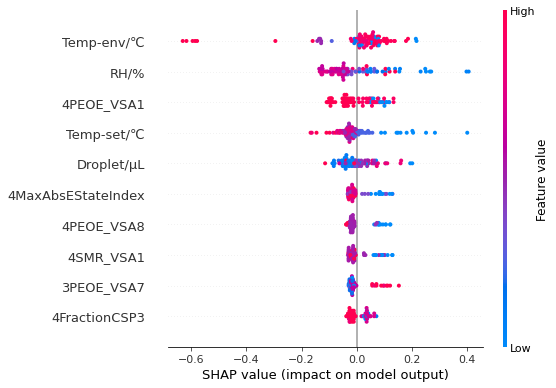

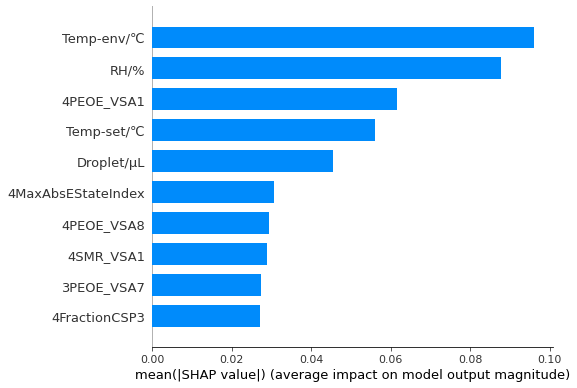

In [4]:
explainer = shap.TreeExplainer(rf_regressor)
shap_values = explainer.shap_values(X_train_stand)
shap.initjs()

shap.summary_plot(shap_values, X_train_stand, feature_names=X.columns, max_display=10)

shap.summary_plot(shap_values, X_train_stand, plot_type="bar", feature_names=X.columns, max_display=10)

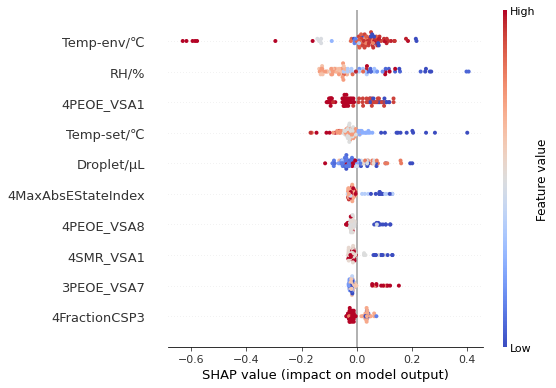

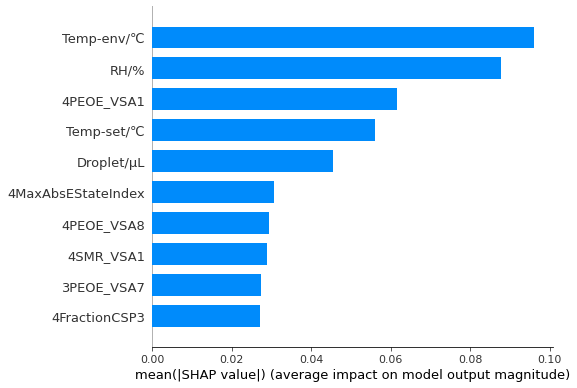

In [5]:
positive_color = "#ca0020"
negative_color = "#92c5de"

tidy_blue = "#1f78b4"  # navy_blue
tidy_red = "#e31a1c"   # red
green = "#18BC9C"      # green
yellow = "#CCBE93"    # yellow
steel_blue = "#a6cee3" # steel_blue

explainer = shap.TreeExplainer(rf_regressor)
shap_values = explainer.shap_values(X_train_stand)
shap.initjs()

plt.figure()
shap.summary_plot(shap_values, X_train_stand, feature_names=X.columns, max_display=10, show=False, cmap="coolwarm")
plt.show()

plt.figure()
shap.summary_plot(shap_values, X_train_stand, plot_type="bar", feature_names=X.columns, max_display=10, show=False)
plt.show()